In [ ]:
!pip install kaggle



In [ ]:
from google.colab import files
import os
import zipfile
!pip install kaggle

In [1]:
from __future__ import division
import numpy as np
import os
import glob
from PIL import Image
from random import *
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


In [2]:
import matplotlib.pyplot as plt

In [3]:
!mkdir -p ~/.kaggle

!mv kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d naderabdalghani/iam-handwritten-forms-dataset
import zipfile
import os

zip_path = 'iam-handwritten-forms-dataset.zip'
extract_dir = '/content/iam-handwritten-forms-dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

if os.path.exists(extract_dir):
    contents = os.listdir(extract_dir)
    print(contents)
else:
    print("Directory does not exist:", extract_dir)


zip_path = '/content/iam-handwritten-forms-dataset.zip'
extract_dir = '/content/iam-handwritten-forms-dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

if os.path.exists(extract_dir):
    contents = os.listdir(extract_dir)
    print(contents)
else:
    print("Directory does not exist:", extract_dir)


mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/naderabdalghani/iam-handwritten-forms-dataset
License(s): unknown
100% 4.31G/4.31G [00:59<00:00, 71.3MB/s]
100% 4.31G/4.31G [00:59<00:00, 77.8MB/s]
['__notebook_source__.ipynb', 'data']
['__notebook_source__.ipynb', 'data']


In [4]:
import os


dict_labels = {}
forms_file_path = "/content/forms_for_parsing.txt"
with open(forms_file_path) as f:
  for l in f:
    l=l.split(' ')
    dict_labels[l[0]]=l[1]


In [5]:

list(dict_labels.items())[0:5]


[('a01-000u', '000'),
 ('a01-000x', '001'),
 ('a01-003', '002'),
 ('a01-003u', '000'),
 ('a01-003x', '003')]

In [6]:
len(dict_labels)

1539

In [7]:
#TOTAL 671

from collections import Counter
n=50

mp={}
for i, j in dict_labels.items():
  if j in mp:
    mp[j]=mp[j]+1
  else:
    mp[j]=1
mp = sorted(mp.items(), key=lambda x: x[1], reverse=True)
target = [mp[i][0] for i in range(0,n)]
print(target)


['000', '150', '151', '152', '153', '154', '384', '551', '552', '588', '635', '670', '671', '155', '333', '334', '336', '337', '338', '339', '340', '341', '342', '343', '344', '345', '346', '347', '348', '349', '634', '332', '335', '118', '209', '315', '415', '085', '567', '025', '026', '037', '123', '125', '126', '128', '130', '133', '173', '174']


In [8]:
sd={1212}
for i in os.listdir("/content/iam-handwritten-forms-dataset/data"):
  for j in os.listdir("/content/iam-handwritten-forms-dataset/data/"+i):
    sd.add(j)

In [9]:
# if "g06-011b.png" in sd:
#   print("I")

In [10]:
import os
from PIL import Image

output_dir = '/content/output/cropped_images'

os.makedirs(output_dir, exist_ok=True)

for j in target:
  data_dir = '/content/iam-handwritten-forms-dataset/data/' + j

  image_files = [file for file in os.listdir(data_dir) if file.endswith(('.png', '.jpg', '.jpeg'))]

  for i in range(0, len(image_files)):
    image_path1 = os.path.join(data_dir, image_files[i])
    image = Image.open(image_path1)

    image_width, image_height = image.size
    crop_width = 255

    crop_start_y = int((image_height - crop_width) / 2) + 100

    crop_box = (0, crop_start_y, image_width, crop_start_y + crop_width)

    cropped_image = image.crop(crop_box).convert('L')  # convert to grayscale

    filename, extension = os.path.splitext(image_files[i])
    new_filename = f"{filename}_cropped{extension}"

    cropped_image.save(os.path.join(output_dir, new_filename))


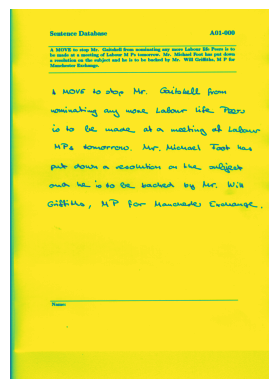

In [11]:
p='/content/iam-handwritten-forms-dataset/data/000/a01-000u.png'

img = Image.open(p)

#  the image
plt.imshow(img)
plt.axis('off')
plt.show()


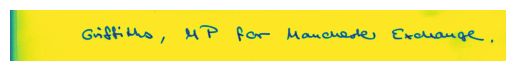

In [12]:
p='/content/output/cropped_images/a01-000u_cropped.png'

img = Image.open(p)  # Update extension as needed

# Display the image
plt.imshow(img)
plt.axis('off')  # Optionally turn off axis
plt.show()


In [13]:
x = []
y = []

base_dir = '/content/iam-handwritten-forms-dataset/data'

for subdir in os.listdir(base_dir):
  if subdir in target:
    if os.path.isdir(os.path.join(base_dir, subdir)):
      data_dir = os.path.join(base_dir, subdir)

      image_files = [file for file in os.listdir(data_dir) if file.endswith(('.png', '.jpg', '.jpeg'))]

      for val in image_files:

        x.append("/content/output/cropped_images/"+val[0:len(val)-4] + "_cropped" + val[len(val)-4:] )
        y.append(subdir)
# /content/output/cropped_images/a01-000u_cropped.png

In [14]:
print(len(x))
# print(y)


452


In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)

print(x[:5], y[:5], encoded_Y[:5])

['/content/output/cropped_images/g06-042l_cropped.png', '/content/output/cropped_images/g06-031l_cropped.png', '/content/output/cropped_images/g06-018l_cropped.png', '/content/output/cropped_images/g06-037l_cropped.png', '/content/output/cropped_images/g06-011l_cropped.png'] ['343', '343', '343', '343', '343'] [33 33 33 33 33]


In [16]:
import numpy as np
x = np.asarray(x)
y = np.asarray(encoded_Y)

In [17]:
from sklearn.model_selection import train_test_split

train_files, rem_files, train_targets, rem_targets = train_test_split(
        x, y, train_size=0.66, random_state=52, shuffle= True)

validation_files, test_files, validation_targets, test_targets = train_test_split(
        rem_files, rem_targets, train_size=0.5, random_state=22, shuffle=True)

print(train_files.shape, validation_files.shape, test_files.shape)
print(train_targets.shape, validation_targets.shape, test_targets.shape)

(298,) (77,) (77,)
(298,) (77,) (77,)


In [31]:

batch_sz = 16
num_cls = 50

def generate_data(data_samples, target_data_files, batch_sz=batch_sz, sample_factor=0.1):
    num_data_samples = len(data_samples)

    while 1:
        for batch_offset in range(0, num_data_samples, batch_sz):
            current_batch_samples = data_samples[batch_offset:batch_offset + batch_sz]
            current_batch_targets = target_data_files[batch_offset:batch_offset + batch_sz]

            image_data = []
            batch_targets = []
            for i in range(len(current_batch_samples)):
                batch_sample = current_batch_samples[i]
                batch_target = current_batch_targets[i]
                img = Image.open(batch_sample)
                cur_width = img.size[0]
                cur_height = img.size[1]
                height_fac = 113 / cur_height

                new_width = int(cur_width * height_fac)
                size = new_width, 113
                resized_img = img.resize((size), Image.ANTIALIAS)
                now_width = resized_img.size[0]
                now_height = resized_img.size[1]
                available_x_points = list(range(0, now_width - 113))

                num_picks = int(len(available_x_points) * sample_factor)
                random_start_x = sample(available_x_points, num_picks)
                for start in random_start_x:
                    cropped_img = resized_img.crop((start, 0, start + 113, 113))
                    image_data.append(np.asarray(cropped_img))
                    batch_targets.append(batch_target)

            X_train = np.array(image_data)
            y_train = np.array(batch_targets)
            X_train = X_train.reshape(X_train.shape[0], 113, 113, 1)
            X_train = X_train.astype('float32')
            X_train /= 255
            y_train = to_categorical(y_train, num_cls)

            yield shuffle(X_train, y_train)



train_generator = generate_data(train_files, train_targets,batch_sz,  0.1)
validation_generator = generate_data(validation_files, validation_targets, batch_sz,  0.1)
test_generator = generate_data(test_files, test_targets, batch_sz,  0.1)

In [32]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Lambda, Activation

import tensorflow
from tensorflow.keras.layers import Conv2D, Cropping2D, ZeroPadding2D, MaxPooling2D
from keras.optimizers import Adam
from keras import metrics

In [33]:

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, ZeroPadding2D
from PIL import Image


In [34]:
def print_generator_data(data_generator, num_batches_to_print=1):
    try:
        for i in range(num_batches_to_print):
            print(data_generator)
            X_train, y_train = next(data_generator)
            print(f"Batch {i+1}:")
            print(f"X_train shape: {X_train.shape}")
            print(f"y_train shape: {y_train.shape}")
            print(f"X_train sample data: {X_train[0]}")
            print(f"y_train sample data: {y_train[0]}")
            print("\n")
    except StopIteration:
        print("Generator has yielded all available data.")

print_generator_data(train_generator, num_batches_to_print=1)


<generator object generate_data at 0x7fa0728f3df0>


<ipython-input-31-d631791ac935>:24: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_img = img.resize((size), Image.ANTIALIAS)


Batch 1:
X_train shape: (1568, 113, 113, 1)
y_train shape: (1568, 50)
X_train sample data: [[[0.9843137 ]
  [0.9843137 ]
  [0.9843137 ]
  ...
  [0.9764706 ]
  [0.9843137 ]
  [0.98039216]]

 [[0.9843137 ]
  [0.9843137 ]
  [0.9843137 ]
  ...
  [0.95686275]
  [0.9607843 ]
  [0.95686275]]

 [[0.9843137 ]
  [0.98039216]
  [0.9843137 ]
  ...
  [0.95686275]
  [0.9764706 ]
  [0.972549  ]]

 ...

 [[0.9764706 ]
  [0.972549  ]
  [0.972549  ]
  ...
  [0.9607843 ]
  [0.9607843 ]
  [0.9490196 ]]

 [[0.98039216]
  [0.9764706 ]
  [0.9764706 ]
  ...
  [0.9607843 ]
  [0.95686275]
  [0.9529412 ]]

 [[0.9764706 ]
  [0.96862745]
  [0.9843137 ]
  ...
  [0.95686275]
  [0.95686275]
  [0.9647059 ]]]
y_train sample data: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]




In [23]:
from PIL import Image
from random import sample
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Conv2D, Activation, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adam

In [35]:


img_height, img_width, img_channels = 113, 113, 1
num_classes = 50

model = Sequential()
model.add(ZeroPadding2D((1, 1), input_shape=(img_height, img_width, img_channels)))

model.add(Conv2D(filters=32, kernel_size=(5, 5), strides=(2, 2), padding='same', name='conv1'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='pool1'))

model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same', name='conv2'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='pool2'))

model.add(Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), padding='same', name='conv3'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='pool3'))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(512, name='dense1'))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256, name='dense2'))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, name='output'))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_1 (ZeroPadd  (None, 115, 115, 1)       0         
 ing2D)                                                          
                                                                 
 conv1 (Conv2D)              (None, 58, 58, 32)        832       
                                                                 
 activation_6 (Activation)   (None, 58, 58, 32)        0         
                                                                 
 pool1 (MaxPooling2D)        (None, 29, 29, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 29, 29, 64)        18496     
                                                                 
 activation_7 (Activation)   (None, 29, 29, 64)        0         
                                                      

In [26]:
len(train_files)

298

In [27]:
# kiratowal
epochs = 40
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_files) // batch_size,
    validation_data=validation_generator,
    validation_steps=len(validation_files) // batch_size,
    epochs=epochs,
    verbose=1
)


<ipython-input-18-24a0cd3864fc>:24: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  imresize = im.resize((size), Image.ANTIALIAS)


Epoch 1/40
18/18 [==============================] - 235s 13s/step - loss: 3.8540 - accuracy: 0.1168 - val_loss: 3.7657 - val_accuracy: 0.1562
Epoch 2/40
18/18 [==============================] - 229s 13s/step - loss: 3.7940 - accuracy: 0.1319 - val_loss: 3.7265 - val_accuracy: 0.1639
Epoch 3/40
18/18 [==============================] - 226s 13s/step - loss: 3.7352 - accuracy: 0.1277 - val_loss: 3.7396 - val_accuracy: 0.1148
Epoch 4/40
18/18 [==============================] - 241s 13s/step - loss: 3.6743 - accuracy: 0.1221 - val_loss: 3.5887 - val_accuracy: 0.1311
Epoch 5/40
18/18 [==============================] - 231s 13s/step - loss: 3.5189 - accuracy: 0.1247 - val_loss: 3.3344 - val_accuracy: 0.1857
Epoch 6/40
18/18 [==============================] - 247s 14s/step - loss: 3.3357 - accuracy: 0.1472 - val_loss: 3.2958 - val_accuracy: 0.1902
Epoch 7/40
18/18 [==============================] - 232s 13s/step - loss: 3.2345 - accuracy: 0.1498 - val_loss: 3.2103 - val_accuracy: 0.1917
Epoch 

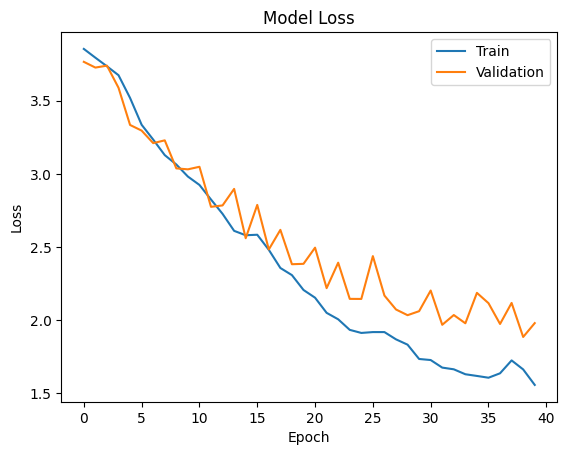

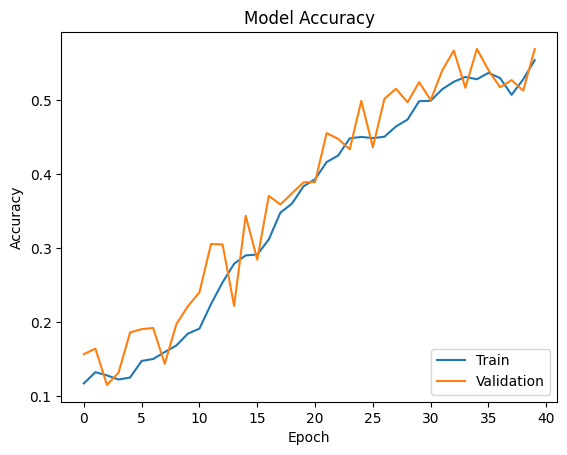

In [28]:
# lidation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()
